In [1]:
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.pyplot import figure
from pandas.io.json import json_normalize

In [2]:
# Load JSON Streaming History Part 1
filepath = os.path.join(".", "data", "StreamingHistory0.json")
print(filepath)
with open(filepath) as jsonfile:
    json_data0 = json.load(jsonfile)

musicdf = pd.DataFrame.from_dict(json_normalize(json_data0), orient='columns')
musicdf.head()

./data/StreamingHistory0.json


,artistName,endTime,msPlayed,trackName
0,Sia,2018-12-07 01:20,151069,Elastic Heart - Live from The Village
1,Russ,2018-12-07 01:22,74443,Ride Slow
2,Nathaniel Rateliff & The Night Sweats,2018-12-07 01:22,37546,S.O.B.
3,Lady Gaga,2018-12-07 01:26,220693,Teeth
4,Tyga,2018-12-07 01:27,56447,Taste (feat. Offset)


In [3]:
# Load JSON Streaming History Part 2
filepath = os.path.join(".","data", "StreamingHistory1.json")
print(filepath)
with open(filepath) as jsonfile:
    json_data1 = json.load(jsonfile)

music1df = pd.DataFrame.from_dict(json_normalize(json_data1), orient='columns')
music1df.head()

./data/StreamingHistory1.json


,artistName,endTime,msPlayed,trackName
0,The Notorious B.I.G.,2019-03-15 19:34,1770,Ready to Die - 2006 Remaster
1,2Pac,2019-03-15 19:35,8618,All Eyez On Me
2,2Pac,2019-03-15 19:35,1023,All Eyez On Me
3,2Pac,2019-03-15 19:35,0,Ambitionz Az A Ridah
4,2Pac,2019-03-15 19:39,259434,Ambitionz Az A Ridah


In [4]:
# Load JSON Streaming History Part 3
filepath = os.path.join(".", "data", "StreamingHistory2.json")
print(filepath)
with open(filepath) as jsonfile:
    json_data2 = json.load(jsonfile)

music2df = pd.DataFrame.from_dict(json_normalize(json_data2), orient='columns')
music2df.head()

./data/StreamingHistory2.json


,artistName,endTime,msPlayed,trackName
0,Tiësto,2019-07-12 17:43,47210,Jackie Chan
1,mansionz,2019-07-12 17:43,3349,STFU
2,Rival,2019-07-12 17:43,7701,Seasons
3,Louis The Child,2019-07-12 17:44,1408,Slow Down Love (feat. Chelsea Cutler)
4,Sia,2019-07-12 17:44,895,"Thunderclouds (feat. Sia, Diplo, and Labrinth)"


In [5]:
# Setting all 3 data frames to a variable
frames = [musicdf, music1df, music2df]

In [6]:
# Creating a new dataframe based on the variable with the combined data
all_music_df = pd.concat(frames)

In [7]:
# Total number of tracks played this year
song_count = all_music_df['trackName'].count()
song_count

29259

In [8]:
# Amount of Spotify played this year in minutes
ms = all_music_df['msPlayed'].sum()
mins_played = ms/60000
mins_played

46213.3288

In [9]:
# Duplicating dataframe to make changes and customizations on
music_sum_df = all_music_df
music_sum_df.head()

,artistName,endTime,msPlayed,trackName
0,Sia,2018-12-07 01:20,151069,Elastic Heart - Live from The Village
1,Russ,2018-12-07 01:22,74443,Ride Slow
2,Nathaniel Rateliff & The Night Sweats,2018-12-07 01:22,37546,S.O.B.
3,Lady Gaga,2018-12-07 01:26,220693,Teeth
4,Tyga,2018-12-07 01:27,56447,Taste (feat. Offset)


In [10]:
# Dropping time stamp
music_sum_df = music_sum_df.drop(['endTime'], axis=1)

In [11]:
# Renaming columns
music_sum_df = music_sum_df.rename(columns={"artistName": "Artist", "msPlayed": "MS_played", "trackName":"Track"})

In [12]:
# Sorting by artist alphabetically
music_sum_df = music_sum_df.sort_values(by=['Artist'])

In [13]:
# Dropping track to only examine artist and time
top_artist_df = music_sum_df
top_artist_df = top_artist_df.drop(['Track'], axis=1)
top_artist_df.head()

,Artist,MS_played
2339,"""Fiddler On The Roof” Motion Picture Chorus",405
3157,$uicideBoy$,789
1517,'68,19783
6208,*NSYNC,1044
6477,*NSYNC,1045


In [14]:
# changing ms to minutes played
top_artist_df['Minutes_played']= top_artist_df['MS_played']/60000
top_artist_df.head()

,Artist,MS_played,Minutes_played
2339,"""Fiddler On The Roof” Motion Picture Chorus",405,0.006750
3157,$uicideBoy$,789,0.013150
1517,'68,19783,0.329717
6208,*NSYNC,1044,0.017400
6477,*NSYNC,1045,0.017417


In [15]:
# Combining artists to examine top artist
top_artist_df = top_artist_df.groupby(['Artist']).sum()
top_artist_df.head()

,MS_played,Minutes_played
Artist,,
"""Fiddler On The Roof” Motion Picture Chorus",405,0.006750
$uicideBoy$,789,0.013150
'68,19783,0.329717
*NSYNC,121319,2.021983
"10,000 Maniacs",406690,6.778167


In [16]:
# Sorting by most amount of time played
top_artist_df = top_artist_df.sort_values(by=['MS_played'], ascending=False)

In [17]:
#Top 5 Spotify Artists 
top_5_df = top_artist_df.head()
top_5_df

,MS_played,Minutes_played
Artist,,
Brandi Carlile,70661468,1177.691133
The Beatles,66250117,1104.168617
Lady Gaga,59954909,999.248483
John Mayer,49401153,823.352550
Arctic Monkeys,45880709,764.678483


In [18]:
# Duplicating a df to examine top tracks
music_sum_df.head(15)
top_tracks_df = music_sum_df

In [19]:
# Combining exact duplicates of the same song
top_tracks_df = top_tracks_df.groupby(['Track'], as_index=False).sum()
top_tracks_df.head(15)

,Track,MS_played
0,!!!!!!!,28270
1,"""Movin' On Up""(Theme from the TV Series ""The J...",12693
2,#1 Crush - Nellee Hooper Mix,3715
3,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,290835
4,&Run,226587
5,'Deed I Do,981
6,'O Sole Mio,216986
7,'O sole mio,265340
8,'Till I Collapse,2020
9,(Don't Fear) The Reaper,2455216


In [20]:
# Sorting Tracks by most longest played
# Important to think about length of song itself, just because it had the most play TIME doesnt mean 
# that it was the most played

top_tracks_df = top_tracks_df.sort_values(['MS_played'], ascending=False)
top_tracks_df.head(10)

,Track,MS_played
5177,Party Of One,15314972
1841,Drive Away,13445458
6078,Slow Dancing in a Burning Room,13099535
6889,The Story,12049994
8058,bad guy,11899285
434,Apocalypse,11776419
111,505,11332758
3951,Let Me Down Easy,9464298
641,Be My Mistake,8746794
4757,New Light,8672929


In [21]:
all_music_df.head()

,artistName,endTime,msPlayed,trackName
0,Sia,2018-12-07 01:20,151069,Elastic Heart - Live from The Village
1,Russ,2018-12-07 01:22,74443,Ride Slow
2,Nathaniel Rateliff & The Night Sweats,2018-12-07 01:22,37546,S.O.B.
3,Lady Gaga,2018-12-07 01:26,220693,Teeth
4,Tyga,2018-12-07 01:27,56447,Taste (feat. Offset)


In [22]:
# Amount of times my top 10 song were played (not neccesarily played all the way through)
play_freq_df = all_music_df['trackName'].value_counts()
play_freq_df.head(10)

Slow Dancing in a Burning Room    92
Party Of One                      80
Apocalypse                        78
bad guy                           76
Golden Hour                       75
The Story                         66
Drive Away                        63
Joanne                            61
The Less I Know The Better        61
1950                              60
Name: trackName, dtype: int64

In [23]:
# Taking OG data set and isolating the date on the play stamp
# endTime column shows what date the song was played and at what time it ended

date_trends_df = all_music_df
play_stamp = date_trends_df["endTime"].str.split(" ", n = 1, expand = True) 
date_trends_df["Date_played"] = play_stamp[0]
date_trends_df.drop(columns= ["endTime"], inplace=True)

In [26]:
# Creating new df date_time to examing amount of time listened by date
date_time_df = date_trends_df
date_time_df.drop(columns = ['artistName','trackName'], inplace=True)

In [27]:
# Converting time column from ms to mins
date_time_df["Minutes_played"] = date_time_df["msPlayed"]/60000

In [28]:
# Creating minutes column and rounding to first decimal
date_time_df["Minutes_played"] = date_time_df["Minutes_played"].round(1)
date_time_df.drop(columns =['msPlayed'], inplace=True)

In [29]:
# Splitting date to individual parts and combining only month and year
split_date = date_time_df["Date_played"].str.split("-", n = 2, expand = True) 
#split_date.head()
date_time_df["Dates"] = split_date[1].map(str) + "-" + split_date[0]
#date_time_df.head()
date_time_df = date_time_df.drop(columns =["Date_played"])

In [30]:
# Grouping all dates into individual months and finding total time listened/month
date_time_df = date_time_df.groupby(['Dates'], as_index=False).sum()

In [31]:
# Re-ordering dataframe 
date_time_df = date_time_df.iloc[[11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]]

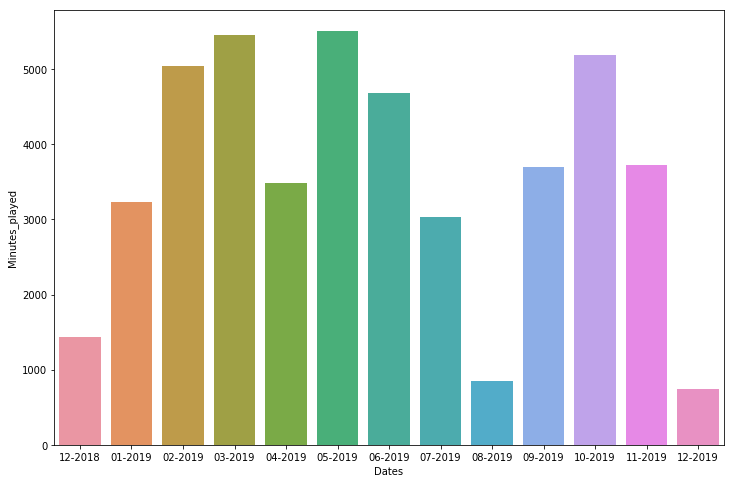

In [32]:
# Graph displaying minutes of spotify listened to per month for 2019
plt.figure(figsize = (12, 8))
time_listened_plot = sns.barplot(x = date_time_df["Dates"] , y = date_time_df["Minutes_played"])